In [1]:
import pandas as pd

df = pd.read_csv("Diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


### **BASIC INFO**

In [2]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Shape: (53940, 10)

Columns: Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None

Missing values:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


### **Unique Values of Categorical Columns**

In [3]:
print("CUT VALUES:", df['cut'].unique())
print("COLOR VALUES:", df['color'].unique())
print("CLARITY VALUES:", df['clarity'].unique())

CUT VALUES: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
COLOR VALUES: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
CLARITY VALUES: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [4]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


### **Checking for impossible values**

In [5]:
df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
2207,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,3142
2314,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
4791,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
5471,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,3837
10167,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,4731
11182,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,4954
11963,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0,5139
13601,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,5564
15951,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
24394,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631


### **Cleaning impossible values**

In [6]:
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]
df.shape

(53920, 10)

# **ENCODE CATEGORICAL FEATURES**

### 1. Cut Encoding
*Ideal → Very Good → Good → Premium → Fair*

In [7]:
cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}
df['cut'] = df['cut'].map(cut_mapping)

### 2. Color Encoding

*D → E → F → G → H → I → J*

In [8]:
color_mapping = {
    'J': 1,
    'I': 2,
    'H': 3,
    'G': 4,
    'F': 5,
    'E': 6,
    'D': 7
}
df['color'] = df['color'].map(color_mapping)

### 3. Clarity Encoding

*IF → VVS1 → VVS2 → VS1 → VS2 → SI1 → SI2 → I1*

In [9]:
clarity_mapping = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8
}
df['clarity'] = df['clarity'].map(clarity_mapping)

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31,326
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31,327
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63,334
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75,335


Depth % (Ideal ranges)



*   Excellent: 59.0% – 61.0%
*   Very Good: 58.0% – 62.0%
* Good: 56.0% – 64.0%

* Fair: 64% – 70%

* Poor: > 70%

👉 So depth must be between 56% and 70% to be realistic.

In [11]:
df = df[(df['depth'] >= 56) & (df['depth'] <= 70)]

Table % (Ideal ranges)

* Excellent: 53–60%

* Very Good: 61–62%

* Good: 62–64%

* Fair: 64–66%

* Poor: > 66 or < 53

👉 So table should be between 53% and 66%

In [12]:
df = df[(df['table'] >= 53) & (df['table'] <= 66)]

Diamonds cannot have:

* x or y of 0 (we removed)

* x or y > 10 (~huge stones unrealistic)

* z > 7 (height unrealistic)

In [13]:
df = df[(df['x'] > 0) & (df['x'] < 10)]
df = df[(df['y'] > 0) & (df['y'] < 10)]
df = df[(df['z'] > 0) & (df['z'] < 7)]

In [14]:
df.shape

(53676, 10)

In [15]:
df.head(

)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31,326
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31,327
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63,334
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75,335


In [16]:
df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,53676.000000,53676.000000,53676.000000,53676.000000,53676.000000,53676.000000,53676.000000,53676.000000,53676.000000,53676.000000
mean,0.796812,3.913965,4.406532,4.053823,61.755149,57.442676,5.729500,5.731637,3.538467,3929.333408
std,0.472202,1.106181,1.701092,1.646832,1.384082,2.168921,1.118488,1.110519,0.690889,3986.262647
min,0.200000,1.000000,1.000000,1.000000,56.000000,53.000000,3.730000,3.680000,1.070000,326.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,4.710000,4.720000,2.910000,947.000000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,5.690000,5.710000,3.520000,2400.000000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.030000,5324.250000
max,3.670000,5.000000,7.000000,8.000000,70.000000,66.000000,9.860000,9.810000,6.380000,18823.000000


# **TRAIN/TEST SPLIT**

In [17]:
X = df.drop('price', axis=1)
y = df['price']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((42940, 9), (10736, 9))

# **BASELINE MODEL (Linear Regression)**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

r2_lr, mae_lr, rmse_lr

(0.911192300317013, 790.6845934065884, np.float64(1183.3492874200376))

# **RANDOM FOREST REGRESSOR**

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

r2_rf, mae_rf, rmse_rf

(0.9809851251257801, 266.11217839401036, np.float64(547.5633590787759))

# **Feature Importance (Which features matter most?)**

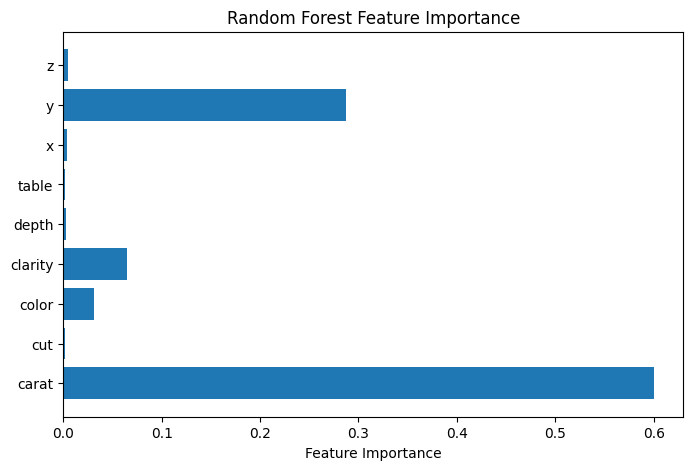

In [21]:
import numpy as np
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# **Hyperparameter Tuning**

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],      # thoda hi options
    'max_depth': [None, 20],
    'min_samples_split': [2, 5]
}

small_rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    small_rf,
    param_grid,
    cv=3,                 # 5 ke jagah 3 folds (fast)
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Best CV Score: 0.9813788544850377


In [24]:
best_rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=20,
    min_samples_split=2,
    random_state=42
)

best_rf.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred_best = best_rf.predict(X_test)

r2_best  = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

r2_best, mae_best, rmse_best

(0.981002169300806, 266.4033705260406, np.float64(547.3178970889065))

In [26]:
import joblib
joblib.dump(best_rf, "diamond_price_RandomForest_model.pkl")

['diamond_price_RandomForest_model.pkl']

# **Summary**

In [28]:
best_params = grid.best_params_
summary = {
    "model": ["RandomForestRegressor"],
    "r2": [r2_best],
    "mae": [mae_best],
    "rmse": [rmse_best],
    "n_estimators": [best_params['n_estimators']]
}
pd.DataFrame(summary).to_csv("model_summary.csv", index=False)
print("Saved model_summary.csv")

Saved model_summary.csv


In [29]:
import joblib

# Load the saved model
loaded_model = joblib.load("diamond_price_RandomForest_model.pkl")

# example input as a dict (use same column order)
sample = {
    "carat": 0.7, "cut":5, "color":6, "clarity":4, "depth":61.8,
    "table":57.0, "x":5.69, "y":5.71, "z":3.52
}
df_sample = pd.DataFrame([sample])
pred_price = loaded_model.predict(df_sample)[0]
print("Predicted price:", round(pred_price, 2))

Predicted price: 2961.3


# **More models for comparison**

In [30]:
# Extra: XGBoost (if you install xgboost)
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGB R2:", r2_score(y_test, y_pred_xgb))

# Extra: GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=200, random_state=42)
gbr.fit(X_train, y_train)
print("GBR R2:", r2_score(y_test, gbr.predict(X_test)))

XGB R2: 0.9811135530471802
GBR R2: 0.9789023490831407


# **Visualizations**

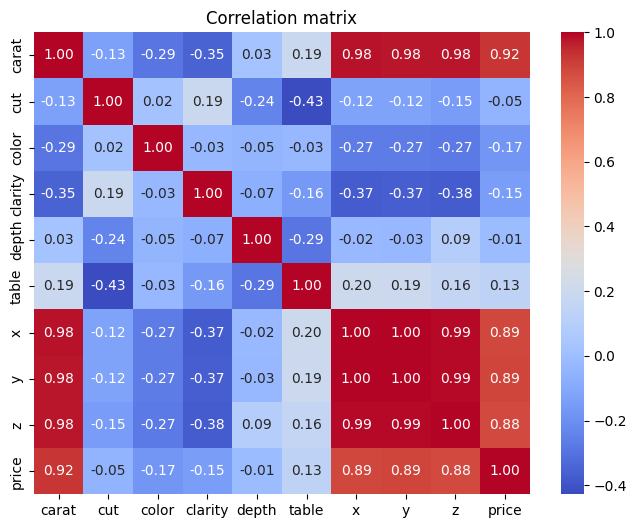

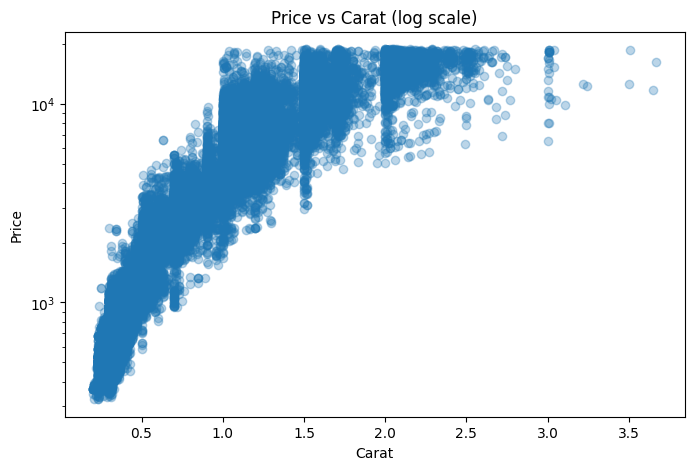

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

# Price vs carat scatter with log scale
plt.figure(figsize=(8,5))
plt.scatter(df['carat'], df['price'], alpha=0.3)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.yscale("log")  # optional for visualization
plt.title("Price vs Carat (log scale)")
plt.show()